In [1]:
from keras.datasets import fashion_mnist

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(x_train_or, y_train), (x_test_or, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train_or.shape

(60000, 28, 28)

In [5]:
plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

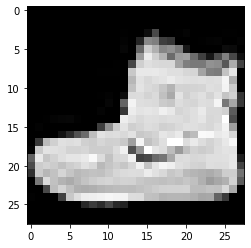

In [6]:
plt.imshow(x_train_or[0])

In [7]:
x_train_or[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
x_train = (x_train_or/255. - 0.5) * 2.
x_test = (x_test_or/255. - 0.5) * 2.

In [9]:
x_train.max()

1.0

In [10]:
# autoencoder

In [11]:
from keras.layers import Dense, Flatten, Reshape, Input
from keras.models import Sequential, Model

In [12]:
# red fully connected 
z_dim = 100
h_dim = 200

In [13]:
# Sequential encoder
encoder = Sequential([
    Flatten(input_shape=(28,28,)),
    Dense(h_dim, activation="relu"),
    Dense(z_dim)
])

In [ ]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
Total params: 177,100
Trainable params: 177,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train[0:1].shape

(1, 28, 28)

In [ ]:
encoder.predict(x_train[0:1])

array([[ 0.32411763, -0.284202  ,  0.1697961 ,  0.31438157,  0.28322613,
         0.8009494 , -0.3741523 , -1.7264258 ,  0.09868544, -0.5175712 ,
        -0.8551214 ,  0.8451484 , -1.453667  , -0.29434127,  0.08567946,
         1.1091752 ,  0.18429074,  0.46294656, -0.5836636 , -0.87437963,
         0.49826503, -0.5319112 , -0.34284988,  1.413697  ,  0.26242083,
        -0.7093843 , -0.33129954,  1.3435179 ,  1.3655976 ,  0.4509164 ,
         0.20806977, -1.0902236 , -1.1029265 ,  0.35754564,  0.8566914 ,
        -0.02506826, -0.48590145, -0.6835201 ,  0.00909016, -1.7523324 ,
         0.3062297 , -0.7800914 ,  0.5316644 , -1.0238831 , -0.12383848,
        -0.36550885, -0.8078047 ,  0.36854595,  0.54588175,  0.33114952,
        -0.13052522, -0.03599802, -0.5285044 , -0.4473085 ,  1.2407737 ,
        -1.6113031 ,  2.1227837 ,  1.8331846 ,  0.880726  , -0.1565242 ,
         0.7903159 , -0.66054916,  0.2997608 ,  1.8070514 ,  0.9010531 ,
        -0.0313423 , -2.0935016 , -0.5337398 ,  2.2

In [ ]:
# manera low level de construir el encoder
inp = Input(shape=(28,28,))
input_flat = Flatten()(inp)
hint = Dense(h_dim, activation="relu")(input_flat)
ztensor = Dense(z_dim)(hint)

encoder = Model(inp, ztensor)

In [ ]:
inp

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>

In [ ]:
input_flat

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten_1')>

In [ ]:
hint

<KerasTensor: shape=(None, 200) dtype=float32 (created by layer 'dense_2')>

In [ ]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               157000    
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
Total params: 177,100
Trainable params: 177,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder.predict(x_train[0:1])

array([[ 0.2795337 , -0.16638169, -1.7190207 ,  0.41974455, -0.68502474,
        -0.63870966, -0.4363398 , -0.22844954, -0.255713  , -0.7860459 ,
        -1.8926882 , -0.30691278,  1.0898452 , -0.07303543, -0.86577326,
         0.38097152, -0.77460116, -0.37765327, -1.2183688 ,  1.0971334 ,
        -0.13883342,  0.77310395, -0.8585174 ,  0.30098155,  1.1407367 ,
         0.939257  ,  0.04098994,  2.110572  ,  0.28236446, -1.2704086 ,
         0.15042987, -0.75353956,  1.0426903 ,  0.12899777,  0.46207374,
        -2.087379  , -0.56563604, -0.96773416, -2.33919   , -0.18458194,
        -0.11401243,  0.08828519, -0.02829227, -0.33594084, -0.47697812,
        -0.8045987 ,  1.0240868 , -0.40867943, -1.8154869 , -1.3154972 ,
        -0.35801286,  1.1111758 , -0.13396737,  1.3217844 , -1.4892564 ,
        -0.7879499 , -1.9569596 , -0.19489856, -0.2941059 , -0.60108227,
         2.2489283 ,  1.2218765 , -0.01915782, -0.75875217,  1.5049626 ,
        -0.4024108 , -0.03755602,  0.3599077 , -0.3

In [ ]:
# paréntesis: implementar capa resnet en medio (no trivial con sequential)
inp = Input(shape=(28,28,))
input_flat = Flatten()(inp)
hint = Dense(h_dim, activation="relu")(input_flat)

hresnet = Dense(h_dim, activation="relu")(hint)
hresnetout = hresnet + hint

ztensor = Dense(z_dim)(hresnetout)

encoder_resnet = Model(inp, ztensor)

In [ ]:
encoder_resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_2 (Flatten)            (None, 784)          0           ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 200)          157000      ['flatten_2[0][0]']              
                                                                                                  
 dense_5 (Dense)                (None, 200)          40200       ['dense_4[0][0]']                
                                                                                            

In [ ]:
encoder_resnet.predict(x_train[0:1])

array([[-0.43889195, -0.4640088 ,  2.218528  , -1.1428454 , -1.0083729 ,
        -0.05039326,  2.3291416 , -0.5637938 ,  1.7857449 , -1.2613188 ,
        -0.5362721 ,  0.11843923, -1.0617079 , -1.4038188 ,  0.8100828 ,
         0.36741158,  1.2343173 ,  0.50052476,  0.47303137, -0.01075098,
         1.0214968 ,  0.41291413, -0.12870371, -0.16407567,  0.72046673,
        -0.25245148,  0.0194394 , -0.99866825, -0.5930273 ,  0.6246738 ,
        -0.08150356, -0.9253797 ,  1.100244  ,  0.69569266, -0.15870371,
        -0.6283214 , -0.7084398 ,  0.09563489,  0.48657545, -1.5120792 ,
        -0.85342044,  0.67052823,  1.5779437 , -1.0882218 , -0.8207066 ,
         1.5775189 , -2.2322457 , -0.3124072 , -1.2528971 , -0.85447216,
         0.767103  , -0.4389616 , -1.0527568 , -2.5913372 ,  0.52968574,
         0.9489167 , -0.318205  ,  0.7654698 , -1.1213138 ,  1.2689401 ,
         1.5251653 , -0.8575295 ,  1.1138426 , -1.1687704 ,  0.12671293,
        -0.10889599, -1.585579  , -0.19935323,  0.6

In [ ]:
# fin paréntesis

In [ ]:
# hacemos el decoder
decoder = Sequential([
    Dense(h_dim, activation="relu", input_shape=(z_dim, )),
    Dense(28*28, activation="tanh"),
    Reshape((28,28)),
])

In [ ]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 200)               20200     
                                                                 
 dense_8 (Dense)             (None, 784)               157584    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 177,784
Trainable params: 177,784
Non-trainable params: 0
_________________________________________________________________


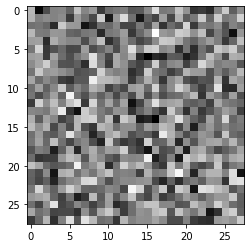

In [ ]:
plt.imshow(decoder.predict(np.random.randn(1, z_dim))[0])

In [ ]:
# autoencoder
autoencoder = Sequential([encoder, decoder])

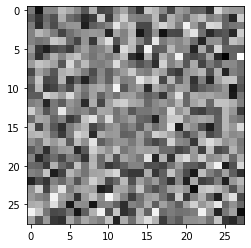

In [ ]:
plt.imshow(autoencoder.predict(x_test[0:1])[0])

In [ ]:
# entrenamiento
autoencoder.compile("adam", "mse")
history = autoencoder.fit(x_train, x_train, batch_size=128, validation_data=(x_test, x_test), shuffle=True, epochs = 80)

Epoch 1/80
469/469 [==============================] - 3s 4ms/step - loss: 0.0858 - val_loss: 0.0497
Epoch 2/80
469/469 [==============================] - 2s 3ms/step - loss: 0.0431 - val_loss: 0.0388
Epoch 3/80
469/469 [==============================] - 2s 4ms/step - loss: 0.0362 - val_loss: 0.0348
Epoch 4/80
469/469 [==============================] - 2s 3ms/step - loss: 0.0326 - val_loss: 0.0318
Epoch 5/80
469/469 [==============================] - 2s 4ms/step - loss: 0.0304 - val_loss: 0.0299
Epoch 6/80
469/469 [==============================] - 2s 4ms/step - loss: 0.0288 - val_loss: 0.0288
Epoch 7/80
469/469 [==============================] - 2s 4ms/step - loss: 0.0276 - val_loss: 0.0276
Epoch 8/80
469/469 [==============================] - 2s 5ms/step - loss: 0.0266 - val_loss: 0.0270
Epoch 9/80
469/469 [==============================] - 2s 4ms/step - loss: 0.0259 - val_loss: 0.0261
Epoch 10/80
469/469 [==============================] - 2s 4ms/step - loss: 0.0253 - val_loss: 0.0255

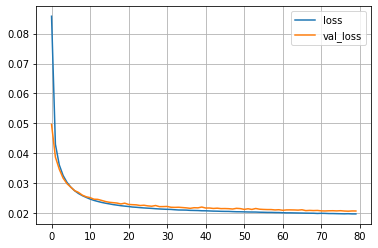

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss", "val_loss"])
plt.grid()

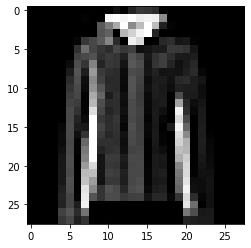

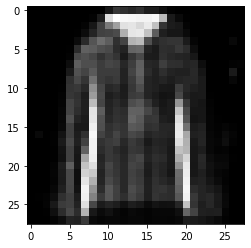

In [ ]:
plt.imshow(x_test[6])
plt.figure()
plt.imshow(autoencoder.predict(x_test[6:7])[0])

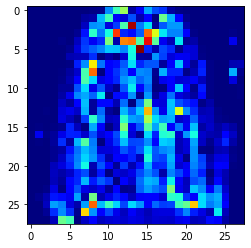

In [ ]:
# ploteamos diferencia
plt.imshow(np.abs(x_test[6]-autoencoder.predict(x_test[6:7])[0]), cmap="jet")


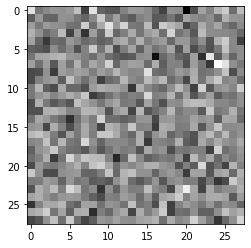

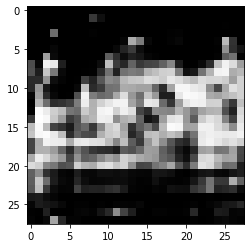

In [ ]:
# y con ruido?
ruido_ent = np.random.randn(28,28)
plt.imshow(ruido_ent)
plt.figure()
plt.imshow(autoencoder.predict(ruido_ent.reshape(1, 28, 28))[0])

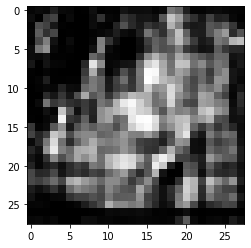

In [ ]:
plt.imshow(decoder.predict(np.random.randn(1,100))[0])

In [ ]:
# evaluación
autoencoder.evaluate(x_test, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0208


0.020802391692996025

$||x-\hat x||^2 = \sum_i (x_i - \hat x_i)^2$ (pero keras divide por n por hacer la media de los píxeles en la imagen también)

In [ ]:
from keras.losses import MAE, MSE

In [ ]:
MAE(x_test.flatten(), autoencoder.predict(x_test).flatten())

<tf.Tensor: shape=(), dtype=float32, numpy=0.07669047>

In [ ]:
# intentamos visualizar el espacio latente
z_pred = encoder.predict(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z_pred)

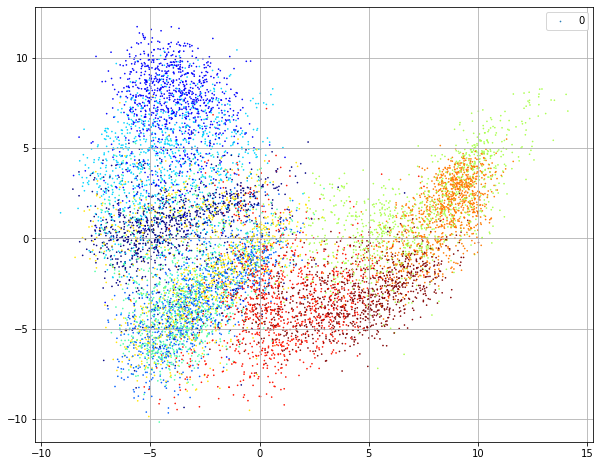

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(z_pca[:,0], z_pca[:, 1], s=0.4, c=y_test, cmap="jet")
plt.grid()

In [ ]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
# autoencoder 2d
encoder2d = Sequential([
    Flatten(input_shape=(28,28,)),
    Dense(200, activation="relu"),
    Dense(2),
])

decoder2d = Sequential([
    Dense(200, activation="relu", input_shape=(2,)),
    Dense(28*28, activation="tanh"),
    Reshape((28,28)),
])

autoencoder2d = Sequential([encoder2d, decoder2d])

In [ ]:
autoencoder2d.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 2)                 157402    
                                                                 
 sequential_5 (Sequential)   (None, 28, 28)            158184    
                                                                 
Total params: 315,586
Trainable params: 315,586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder2d.compile("adam", "mse")
history = autoencoder2d.fit(x_train, x_train, validation_data = (x_test, x_test), batch_size = 128, shuffle=True, epochs=80)

Epoch 1/80
469/469 [==============================] - 2s 4ms/step - loss: 0.1652 - val_loss: 0.1389
Epoch 2/80
469/469 [==============================] - 2s 4ms/step - loss: 0.1354 - val_loss: 0.1320
Epoch 3/80
469/469 [==============================] - 2s 5ms/step - loss: 0.1301 - val_loss: 0.1277
Epoch 4/80
469/469 [==============================] - 2s 4ms/step - loss: 0.1266 - val_loss: 0.1244
Epoch 5/80
469/469 [==============================] - 2s 4ms/step - loss: 0.1238 - val_loss: 0.1234
Epoch 6/80
469/469 [==============================] - 2s 4ms/step - loss: 0.1215 - val_loss: 0.1206
Epoch 7/80
469/469 [==============================] - 2s 4ms/step - loss: 0.1197 - val_loss: 0.1193
Epoch 8/80
469/469 [==============================] - 2s 4ms/step - loss: 0.1184 - val_loss: 0.1184
Epoch 9/80
469/469 [==============================] - 2s 4ms/step - loss: 0.1172 - val_loss: 0.1172
Epoch 10/80
469/469 [==============================] - 2s 4ms/step - loss: 0.1163 - val_loss: 0.1167

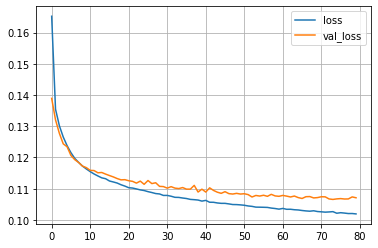

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.grid()

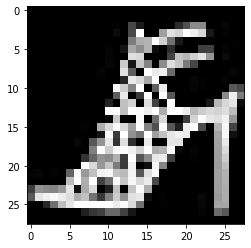

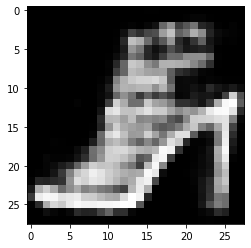

In [ ]:
img_test = x_test[np.random.randint(10000)]
plt.imshow(img_test)
plt.figure()
plt.imshow(autoencoder.predict(img_test.reshape(-1, 28, 28))[0])

In [ ]:
# -1 en reshape?
ej = np.random.randn(900)
ej.reshape(-1, 3, 3).shape

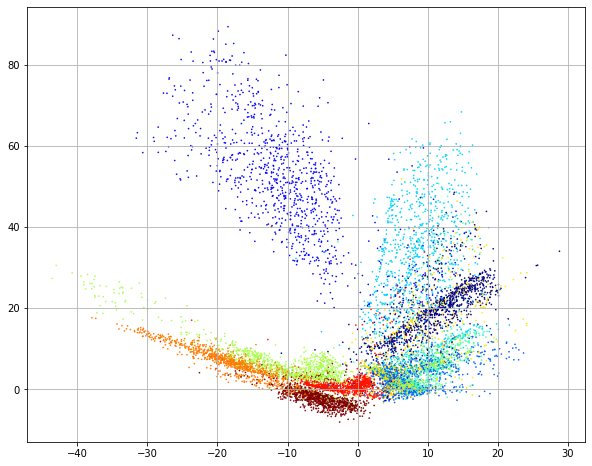

In [ ]:
zpred2d = encoder2d.predict(x_test)
plt.figure(figsize=(10,8))
plt.scatter(zpred2d[:,0], zpred2d[:, 1], s=0.4, c=y_test, cmap="jet")
plt.grid()

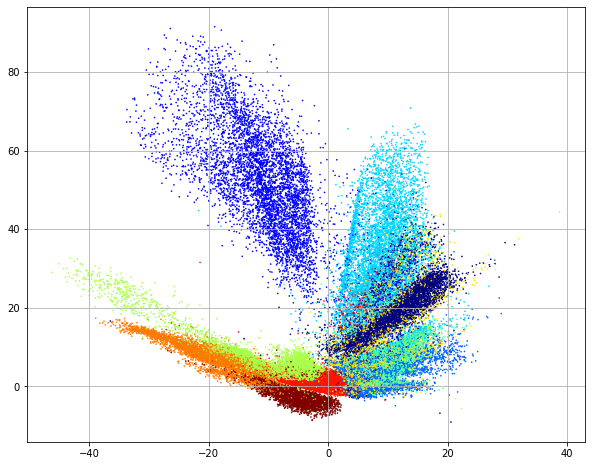

In [ ]:
zpred2d = encoder2d.predict(x_train)
plt.figure(figsize=(10,8))
plt.scatter(zpred2d[:,0], zpred2d[:, 1], s=0.4, c=y_train, cmap="jet")
plt.grid()

In [ ]:
# autoencoder convolucional

In [ ]:
from keras.layers import Conv2D, Conv2DTranspose

In [ ]:
z_dim = 100


In [ ]:
encoderc = Sequential([
    Reshape((28, 28, 1), input_shape=(28,28)),
    Conv2D(50, 3, 2, activation = "relu"),
    Conv2D(100, 3, 2, activation = "relu"),
    Conv2D(50, 3, 1, activation = "relu"),
    Flatten(),
    Dense(z_dim)
])

In [ ]:
encoderc.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_51 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
 conv2d_55 (Conv2D)          (None, 13, 13, 50)        500       
                                                                 
 conv2d_56 (Conv2D)          (None, 6, 6, 100)         45100     
                                                                 
 conv2d_57 (Conv2D)          (None, 4, 4, 50)          45050     
                                                                 
 flatten_27 (Flatten)        (None, 800)               0         
                                                                 
 dense_62 (Dense)            (None, 100)               80100     
                                                                 
Total params: 170,750
Trainable params: 170,750
Non-t

In [ ]:
decoderc = Sequential([
    Dense(5*5*10, activation="relu", input_shape=(z_dim,)),
    Reshape((5, 5, 10)),
    Conv2DTranspose(100, 5, 1, padding="same", activation="relu"),
    Conv2DTranspose(50, 5, 2, padding="valid", activation="relu"),
    Conv2DTranspose(1, 4, 2, padding="valid", activation="tanh"),
    Reshape((28,28))
])

In [ ]:
decoderc.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 250)               25250     
                                                                 
 reshape_56 (Reshape)        (None, 5, 5, 10)          0         
                                                                 
 conv2d_transpose_43 (Conv2D  (None, 5, 5, 100)        25100     
 Transpose)                                                      
                                                                 
 conv2d_transpose_44 (Conv2D  (None, 13, 13, 50)       125050    
 Transpose)                                                      
                                                                 
 conv2d_transpose_45 (Conv2D  (None, 28, 28, 1)        801       
 Transpose)                                                      
                                                     

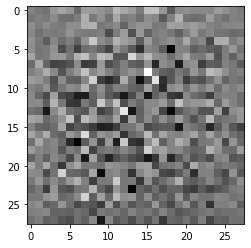

In [ ]:
plt.imshow(decoderc.predict(np.random.randn(1,100))[0])

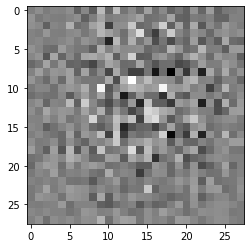

In [ ]:
autoencoderc = Sequential([encoderc, decoderc])
plt.imshow(autoencoderc.predict(x_train[3:4])[0])

In [ ]:
np.random.randn(1,2,2)

array([[[ 0.91101297,  1.95877502],
        [-0.8882843 , -0.55773893]]])

In [ ]:
# entrenamos
# autoencoderc.compile("adam", "mse")
history = autoencoderc.fit(x_train, x_train, batch_size=128, validation_data=(x_test, x_test), shuffle=True, epochs=10)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.0186 - val_loss: 0.0186
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0178 - val_loss: 0.0185
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0178 - val_loss: 0.0184
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0177 - val_loss: 0.0185
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0176 - val_loss: 0.0183
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0175 - val_loss: 0.0186
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0174 - val_loss: 0.0180
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0174 - val_loss: 0.0180
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0173 - val_loss: 0.0184
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0172 - val_loss: 0.018

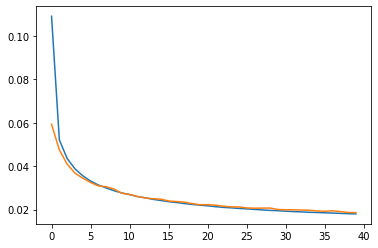

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

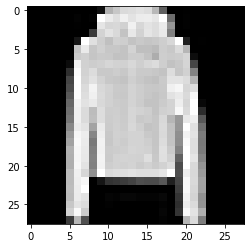

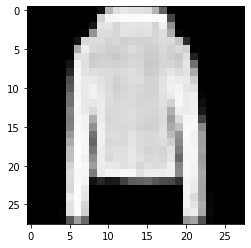

In [ ]:
img_test = x_test[np.random.randint(10000)]
plt.imshow(img_test)
plt.figure()
plt.imshow(autoencoderc.predict(img_test.reshape(-1, 28, 28))[0])

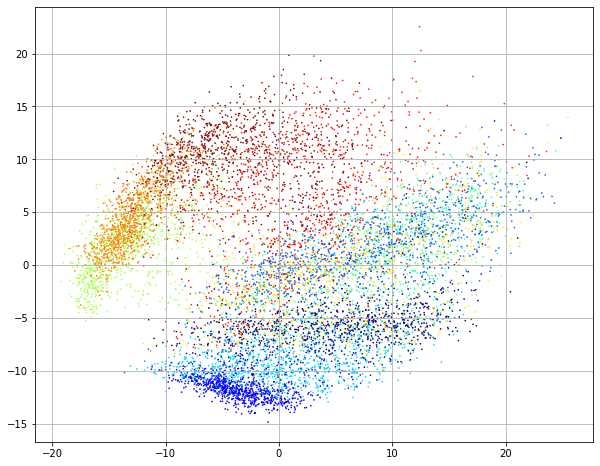

In [ ]:
z_pred = encoderc.predict(x_test)
z_pca = pca.fit_transform(z_pred)

plt.figure(figsize=(10,8))
plt.scatter(z_pca[:,0], z_pca[:, 1], s=0.4, c=y_test, cmap="jet")
plt.grid()

In [ ]:
# autoencoder 2d conv

In [ ]:
encoderc = Sequential([
    Reshape((28, 28, 1), input_shape=(28,28)),
    Conv2D(50, 3, 2, activation = "relu"),
    Conv2D(150, 3, 2, activation = "relu"),
    Conv2D(60, 3, 1, activation = "relu"),
    Flatten(),
    Dense(2)
])

In [ ]:
encoderc.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_64 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
 conv2d_70 (Conv2D)          (None, 13, 13, 50)        500       
                                                                 
 conv2d_71 (Conv2D)          (None, 6, 6, 150)         67650     
                                                                 
 conv2d_72 (Conv2D)          (None, 4, 4, 60)          81060     
                                                                 
 flatten_32 (Flatten)        (None, 960)               0         
                                                                 
 dense_71 (Dense)            (None, 2)                 1922      
                                                                 
Total params: 151,132
Trainable params: 151,132
Non-t

In [ ]:
decoderc = Sequential([
    Dense(5*5*10, activation="relu", input_shape=(2,)),
    Reshape((5, 5, 10)),
    Conv2DTranspose(100, 5, 1, padding="same", activation="relu"),
    Conv2DTranspose(50, 5, 2, padding="valid", activation="relu"),
    Conv2DTranspose(1, 4, 2, padding="valid", activation="tanh"),
    Reshape((28,28))
])

In [ ]:
decoderc.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 250)               750       
                                                                 
 reshape_65 (Reshape)        (None, 5, 5, 10)          0         
                                                                 
 conv2d_transpose_49 (Conv2D  (None, 5, 5, 100)        25100     
 Transpose)                                                      
                                                                 
 conv2d_transpose_50 (Conv2D  (None, 13, 13, 50)       125050    
 Transpose)                                                      
                                                                 
 conv2d_transpose_51 (Conv2D  (None, 28, 28, 1)        801       
 Transpose)                                                      
                                                     

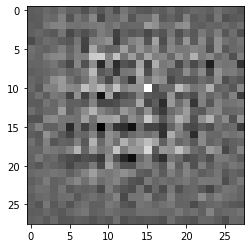

In [ ]:
plt.imshow(decoderc.predict(np.random.randn(1,2))[0])

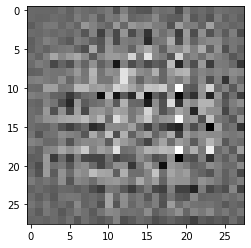

In [ ]:
autoencoderc = Sequential([encoderc, decoderc])
plt.imshow(autoencoderc.predict(x_train[3:4])[0])

In [ ]:
# entrenamos
autoencoderc.compile("adam", "mse")
history = autoencoderc.fit(x_train, x_train, batch_size=128, validation_data=(x_test, x_test), shuffle=True, epochs=50)

Epoch 1/50
469/469 [==============================] - 6s 10ms/step - loss: 0.1972 - val_loss: 0.1405
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1346 - val_loss: 0.1289
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1264 - val_loss: 0.1242
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1223 - val_loss: 0.1208
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1196 - val_loss: 0.1191
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1180 - val_loss: 0.1186
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1166 - val_loss: 0.1156
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1150 - val_loss: 0.1150
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1141 - val_loss: 0.1140
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1132 - val_loss: 0.112

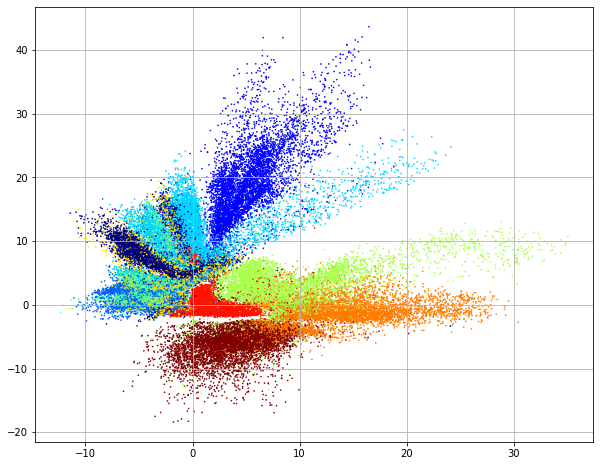

In [ ]:
z_pred = encoderc.predict(x_train)

plt.figure(figsize=(10,8))
plt.scatter(z_pred[:,0], z_pred[:, 1], s=0.4, c=y_train, cmap="jet")
plt.grid()

In [ ]:
# y con pca?

In [ ]:
pca = PCA()
componentsx = pca.fit_transform(x_train.reshape(-1, 28*28))

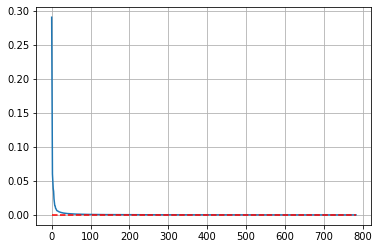

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.zeros(28*28), "--", c="r")
plt.grid()

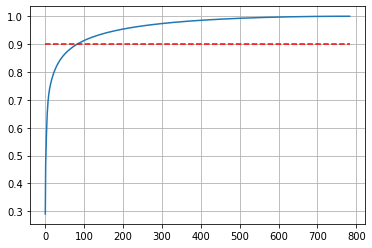

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.plot(np.ones(28*28)*0.9, "--", c="r")
plt.grid()

In [ ]:
pca.explained_variance_[101:].sum()

23.740056289144807

In [ ]:
pca = PCA(n_components=100)
componentsx = pca.fit_transform(x_train.reshape(-1, 28*28))

In [ ]:
xpred = pca.inverse_transform(pca.transform(x_test.reshape(-1, 28*28)))

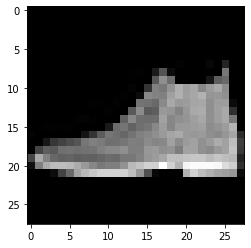

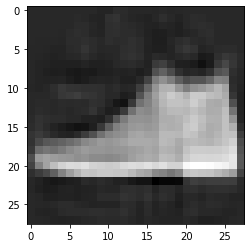

In [ ]:
plt.imshow(x_test[0])
plt.figure()
plt.imshow(xpred[0].reshape(28,28))

In [ ]:
from keras.losses import MSE

In [ ]:
MSE(x_test.flatten(), xpred.flatten())

<tf.Tensor: shape=(), dtype=float64, numpy=0.03074840247366733>